# Airline Customer Value Analysis Case

* Deskripsi:  
Dataset ini berisi data customer sebuah perusahaan penerbangan dan 
beberapa fitur yang dapat menggambarkan value dari customer tersebut.   
* Data:   
Setiap baris mewakili customer, setiap kolom berisi atribut customer

| Code         | Deskripsi |
|:--------------|:-----|
|MEMBER_NO-b   | : ID Member|
|FFP_DATE    |: Frequent Flyer Program Join Date|
|FIRST_FLIGHT_DATE  |: Tanggal Penerbangan pertama|
|GENDER  |: Jenis Kelamin|
|FFP_TIER | : Tier dari Frequent Flyer Program|
|WORK_CITY | : Kota Asal|
|WORK_PROVINCE | : Provinsi Asal|
|WORK_COUNTRY | : Negara Asal|
|AGE | : Umur Customer|
|LOAD_TIME | : Tanggal data diambil|
|FLIGHT_COUNT | : Jumlah penerbangan Customer|
|BP_SUM | : Rencana Perjalanan|
|SUM_YR_1 | : Fare Revenue|
|SUM_YR_2 | : Votes Prices|
|SEG_KM_SUM | : Total jarak(km) penerbangan yg sudah dilakukan|
|LAST_FLIGHT_DATE | : Tanggal penerbangan terakhir|
|LAST_TO_END | : Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir|
|AVG_INTERVAL | : Rata-rata jarak waktu|
|MAX_INTERVAL | : Maksimal jarak waktu|
|EXCHANGE_COUNT | : Jumlah penukaran|
|avg_discount | : Rata rata discount yang didapat customer|
|Points_Sum | : Jumlah poin yang didapat customer |
|Point_NotFlight | : point yang tidak digunakan oleh members |    

Dalam Projek kali ini dilakukan bebera langkah pengerjaan sebagai berikut:   
* **Data Collection**
* **Exploratory Data Analysis (EDA)** yang mencakup Data understanding (tipe data, missing value, dan data duplicate), statistika deskriptif, Univariate Analysis dan Multivariate Analysis
* **Data Preprocessing** yang mencakup pemilihan feature-feature untuk clustering yang sesuai dengan bisnis
* **Clustering K-means** untuk menemukan jumlah cluster yang optimal dan evaluasi cluster yang dihasilkan dengan visualisasi dan silhouette score
* **Interpretasi cluster** yang dihasilkan secara bisnis dan rekomendasi yang sesuai dengan cluster yang dihasilkan

## Data Collection

In [ ]:
#import library

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


print('numpy version : ',np.__version__)
print('pandas version : ',pd.__version__)
print('seaborn version : ',sns.__version__)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

numpy version :  1.21.6
pandas version :  1.3.5
seaborn version :  0.11.2


In [ ]:
#dataset
URL_dataset ='https://drive.google.com/file/d/1HHaEqP5M5pzecfyx1BvTSPKl279gVON6/view?usp=sharing'
dataset = 'https://drive.google.com/uc?export=download&id='+URL_dataset.split('/')[-2]
df = pd.read_csv(dataset)
df.sample(5)

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
58723,11317,10/15/2005,12/3/2005,Female,4,shenzhen,guangdong,CN,45.0,3/31/2014,...,532.0,2422,3/5/2014,27,597.000000,597,0,0.604575,984,0
45622,11202,6/21/2005,7/23/2005,Male,4,beijing,beijing,CN,56.0,3/31/2014,...,3208.0,6178,2/13/2014,48,60.500000,112,0,0.567977,1596,0
58041,14915,4/11/2012,11/2/2012,Male,4,beijing,beijing,CN,41.0,3/31/2014,...,0.0,2189,1/28/2013,429,43.500000,82,0,0.717200,1060,0
8195,19339,4/15/2007,6/4/2007,Male,6,guangzhou,guangdong,CN,49.0,3/31/2014,...,8488.0,34061,12/2/2013,121,25.904762,126,2,0.738267,22820,3
50028,14759,8/12/2011,8/19/2011,Female,4,shanghai,-,CN,40.0,3/31/2014,...,1613.0,3138,2/16/2014,45,179.000000,330,0,0.876667,2952,0


## Exploratory Data Analysis (EDA)

In [ ]:
#Tipe data masing-masing kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [ ]:
data_missing_value = df.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df))*100,4)
data_missing_value = data_missing_value.sort_values('percentage',ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.1565
1,WORK_CITY,2269,3.6023
2,SUM_YR_1,551,0.8748
3,AGE,420,0.6668
4,SUM_YR_2,138,0.2191
5,WORK_COUNTRY,26,0.0413
6,GENDER,3,0.0048


In [ ]:
# merubah tipe data menggunakan handling errors = 'coerce'
# dimana jika terjadi kesahalan pada data makan nilai data akan menjadi NaT
# semisal ketika data yang diinput adalah 2014/2/29 yang bukan merupakan tahun kabisat maka nilai tersebut akan diubah menjadi NaT
from datetime import datetime, timedelta
df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']] = df[['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']].apply(pd.to_datetime, errors='coerce')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          62988 non-null  int64         
 1   FFP_DATE           62988 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  62988 non-null  datetime64[ns]
 3   GENDER             62985 non-null  object        
 4   FFP_TIER           62988 non-null  int64         
 5   WORK_CITY          60719 non-null  object        
 6   WORK_PROVINCE      59740 non-null  object        
 7   WORK_COUNTRY       62962 non-null  object        
 8   AGE                62568 non-null  float64       
 9   LOAD_TIME          62988 non-null  datetime64[ns]
 10  FLIGHT_COUNT       62988 non-null  int64         
 11  BP_SUM             62988 non-null  int64         
 12  SUM_YR_1           62437 non-null  float64       
 13  SUM_YR_2           62850 non-null  float64       
 14  SEG_KM

Tipe data `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, `LAST_FLIGHT_DATE` sudah dirubah menjadi tipe data **datetime**

In [ ]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE      421
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

Dari informasi di atas diperoleh bahwa data terdiri dari 62988 baris dan 23 kolom dan tidak terdapat data duplicate. Pada beberapa kolom terdapat missing value yang nanti akan dilakukan handling missing value. Selain itu, ditemukan juga bahwa terdapat beberapa tipe data yang tidak sesuai.
* missing value terdapat pada kolom `GENDER`, `WORK_CITY`, `WORK_PROVINCE`, `WORK_COUNTRY`, `AGE`, `SUM_YR_1`,dan `SUM_YR_2`.
* Tipe data yang tidak sesuai adalah pada data `FFP_DATE`, `FIRST_FLIGHT_DATE`, `LOAD_TIME`, dan `LAST_FLIGHT_DATE` yang akan diubah dari **object** menjadi **datetime**.

### Statistika deskriptif

#### Data numerik

In [ ]:
#NumeriK
numeric = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print('Jumlah data numerikal adalah:',len(numeric))
numeric

Jumlah data numerikal adalah: 15


['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']

In [ ]:
df.describe()

,MEMBER_NO,FFP_TIER,AGE,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
count,62988.000000,62988.000000,62568.000000,62988.000000,62988.000000,62437.000000,62850.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.000000,62988.0000,62988.000000
mean,31494.500000,4.102162,42.476346,11.839414,10925.081254,5355.376064,5604.026014,17123.878691,176.120102,67.749788,166.033895,0.319775,0.721558,12545.7771,2.728155
std,18183.213715,0.373856,9.885915,14.049471,16339.486151,8109.450147,8703.364247,20960.844623,183.822223,77.517866,123.397180,1.136004,0.185427,20507.8167,7.364164
min,1.000000,4.000000,6.000000,2.000000,0.000000,0.000000,0.000000,368.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000
25%,15747.750000,4.000000,35.000000,3.000000,2518.000000,1003.000000,780.000000,4747.000000,29.000000,23.370370,79.000000,0.000000,0.611997,2775.0000,0.000000
50%,31494.500000,4.000000,41.000000,7.000000,5700.000000,2800.000000,2773.000000,9994.000000,108.000000,44.666667,143.000000,0.000000,0.711856,6328.5000,0.000000
75%,47241.250000,4.000000,48.000000,15.000000,12831.000000,6574.000000,6845.750000,21271.250000,268.000000,82.000000,228.000000,0.000000,0.809476,14302.5000,1.000000
max,62988.000000,6.000000,110.000000,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,731.000000,728.000000,728.000000,46.000000,1.500000,985572.0000,140.000000


* Terdapat 14 data numerik selaian Member ID
* Mayoritas distribusi data bersifat skewness positive dimana nilai `mean > median`
* data `MEMBER_NO, FFP_TIER dan avg_discount` memiliki nilai `mean` yang hampir sama dengan `median` yang menandakan distribusi menyerupai distribusi normal.
* Mayoritas nilai standar deviasi tidak memiliki perbedaan yang cukup jauh dari rata-ratanya.
* Terdapat nilai yang aneh pada kolom `SUM_YR_1` bernilai `0` yang menandakan `Fare Revenu` bernilai `0` dan `avg_discount` yang bernilai `0` sehingga perlu dilakukan analisis lebih lanjut.
* Mayoritas data memiliki perbedaan yang sangat jauh antara nilai `min` dengan `Q1 atau 25%`, dan nilai `max dengan 75%` yang menandakan adanya `outlier`. Sehingga perlu dilakukan analisis lebih lanjut.
* Pada kolom `AGE` terdapat nilai yang aneh yaitu `110` sehingga dapat dilakukan penghapusan


#### Data categorikal

In [ ]:
#Kategorikal
categorical = df.loc[:, (df.dtypes == object)].columns.tolist()
print('Jumlah data Kategorikal adalah:',len(categorical))
categorical

Jumlah data Kategorikal adalah: 4


['GENDER', 'WORK_CITY', 'WORK_PROVINCE', 'WORK_COUNTRY']

In [ ]:
sd_c = df.select_dtypes('object').describe().T
sd_c['percentage(%)'] = (sd_c['freq']/sd_c['count'])*100
sd_c

,count,unique,top,freq,percentage(%)
GENDER,62985,2,Male,48134,76.42137
WORK_CITY,60719,3234,guangzhou,9386,15.458094
WORK_PROVINCE,59740,1165,guangdong,17509,29.308671
WORK_COUNTRY,62962,118,CN,57748,91.718815


* Customer yang paling banyak adalah customer laki-laki (`Male`) dengan persentase sebesar `76.42%`.
* Customer paling banyak berasal dari kota `guangzhou` dengan persentase sebesar `15.46%`.
* Customer paling banyak berasal dari provinsi `guangdong` dengan persentase sebesar `29.31%`.
* Customer paling banyak berasal dari China `CN` dengan persentase `91.72%`.
* Data ini sepertinya berasal dari data maskapai penerbangan China.

#### Data datetime

In [ ]:
#datetime
date_data = df.loc[:, (df.dtypes != float) & (df.dtypes != int) & (df.dtypes != object)].columns.tolist()
print('Jumlah data datetime adalah:',len(date_data))
date_data

Jumlah data datetime adalah: 4


['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']

In [ ]:
df.select_dtypes('datetime64[ns]').describe()

,FFP_DATE,FIRST_FLIGHT_DATE,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62988,62567
unique,3068,3406,1,730
top,2011-01-13 00:00:00,2013-02-16 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00
freq,184,96,62988,959
first,2004-11-01 00:00:00,1905-12-31 00:00:00,2014-03-31 00:00:00,2012-04-01 00:00:00
last,2013-03-31 00:00:00,2015-05-30 00:00:00,2014-03-31 00:00:00,2014-03-31 00:00:00


* Berdasarkan `FIRST_FLIGHT_DATE` dapat diketahui bahwa penerbangan pertama kali dilakukan pada `31 Desember 1905`. Dimana rentang penerbangan pertama customer yaitu dari `31 Desember 1905` hingga `30 Mei 2015`. Dengan customer yang melakukan penerbangan pertamanya terbanyak pada `16 Februari 2013`.
* Berdasarkan  `LAST_FLIGHT_DATE` dapat diketahui bahwa perbangan terakhir adalah pada `31 Maret 2014`. Dimana rentangan penerbangan terkahir customer berada pada rentang `1 April 2012` hingga `31 Maret 2014`. Dengan customer yang melakukan penerbangan terakhirnya terbanyak pada `31 Maret 2014`.
* Berdasarkan `FFP_DATE` kebanyakan customer mengikuti program pada `13 Januari 2011` dengan rentang program yaitu dari `1 November 2004` hingga `31 Maret 2013`.
* Berdasarkan `LOAD_TIME` dapat diketahui bahwa data diambil pada `31 Maret 2014`.

In [ ]:
#melihat kesalahan data pada data date time
date_list = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME', 'LAST_FLIGHT_DATE']
for i in date_list:
  bool_series = df[df[i].isnull()]
  bool_series.append(bool_series)
  bool_series = bool_series.drop_duplicates(subset='MEMBER_NO').reset_index(drop=True)

bool_series

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,56497,2007-06-17,2007-06-17,Female,6,guangzhou,guangdong,CN,46.0,2014-03-31,...,70845.0,85000,NaT,32,13.250000,57,0,1.373478,132653,4
1,17306,2009-08-26,2010-04-29,Male,5,haerbin,heilongjiang,CN,70.0,2014-03-31,...,46323.0,69453,NaT,32,22.766667,75,6,1.375395,101413,7
2,915,2006-11-10,2007-01-26,Male,5,.,beijing,CN,39.0,2014-03-31,...,30580.0,65717,NaT,32,14.250000,65,1,1.425974,93153,8
3,20336,2005-07-13,2005-08-06,Male,5,guangzhou,guangdong,CN,40.0,2014-03-31,...,36417.0,114222,NaT,32,8.696203,34,2,0.664970,91476,15
4,62884,2006-05-24,2007-04-21,Male,5,wuhan,hubei,CN,50.0,2014-03-31,...,35680.0,49859,NaT,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,55995,2013-01-11,2013-07-10,Male,4,dalianshi,liaoning,CN,23.0,2014-03-31,...,955.0,3513,NaT,32,117.000000,211,0,0.276667,0,0
417,48742,2009-07-26,2009-07-26,Male,4,tianjin,tianjin,CN,37.0,2014-03-31,...,966.0,1298,NaT,32,135.000000,135,0,0.690000,1094,1
418,9190,2011-04-11,2011-04-20,Male,4,guangzhou,guangdong,CN,34.0,2014-03-31,...,853.0,2595,NaT,32,1.000000,1,0,0.340000,3356,19
419,38776,2007-10-31,2008-03-13,Male,4,foshan,guangdong,CN,42.0,2014-03-31,...,688.0,1199,NaT,32,78.000000,78,0,0.489525,276,0


In [ ]:
percentage_NaT = round((len(bool_series)/len(df))*100,3)
print(f'persentase kesalahan data pada data date time adalah',percentage_NaT,'% dari total data')

persentase kesalahan data pada data date time adalah 0.668 % dari total data


Karena persentase yang cukup kecil (`0.668 %`) maka data ini dapat dilakukan penghapus di tahapan selanjutnya.

### Univariate Analysis

#### Data Numerik

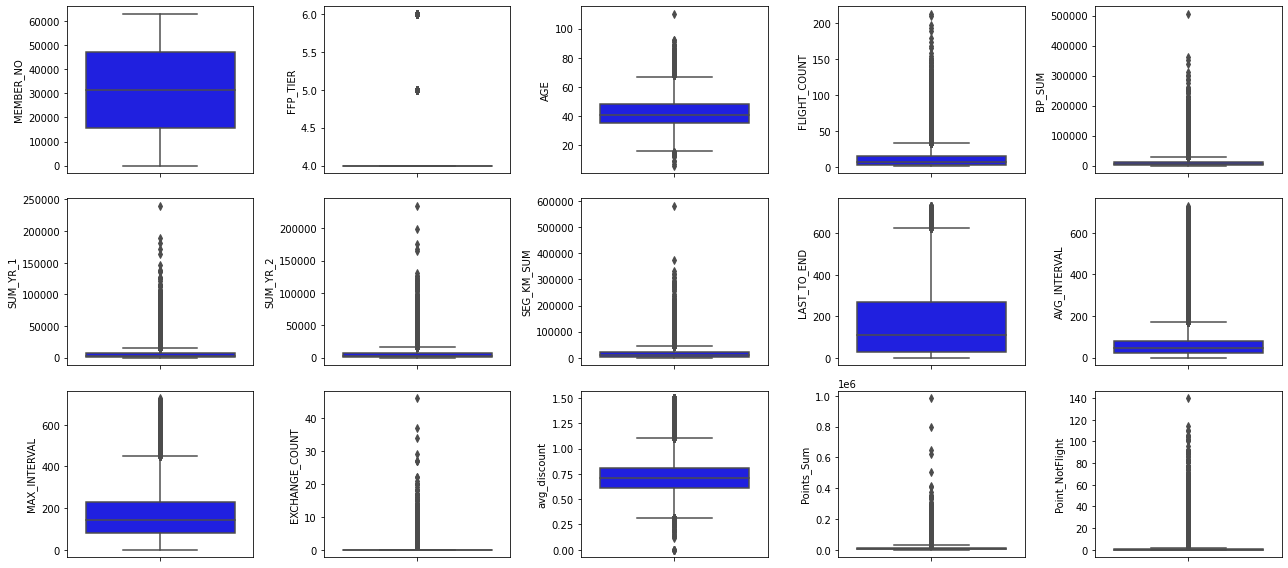

In [ ]:
plt.figure(figsize=(18, 8))
for i in range(0, len(numeric)):
  plt.subplot(3,5,i+1)
  sns.boxplot(y=df[numeric[i]], color='blue')
  plt.tight_layout();

Secara keseluruhan setiap kolom memiliki outliers kecuali pada data `MEMBER_NO`. Sehingga diperlukan handling outliers nantinya

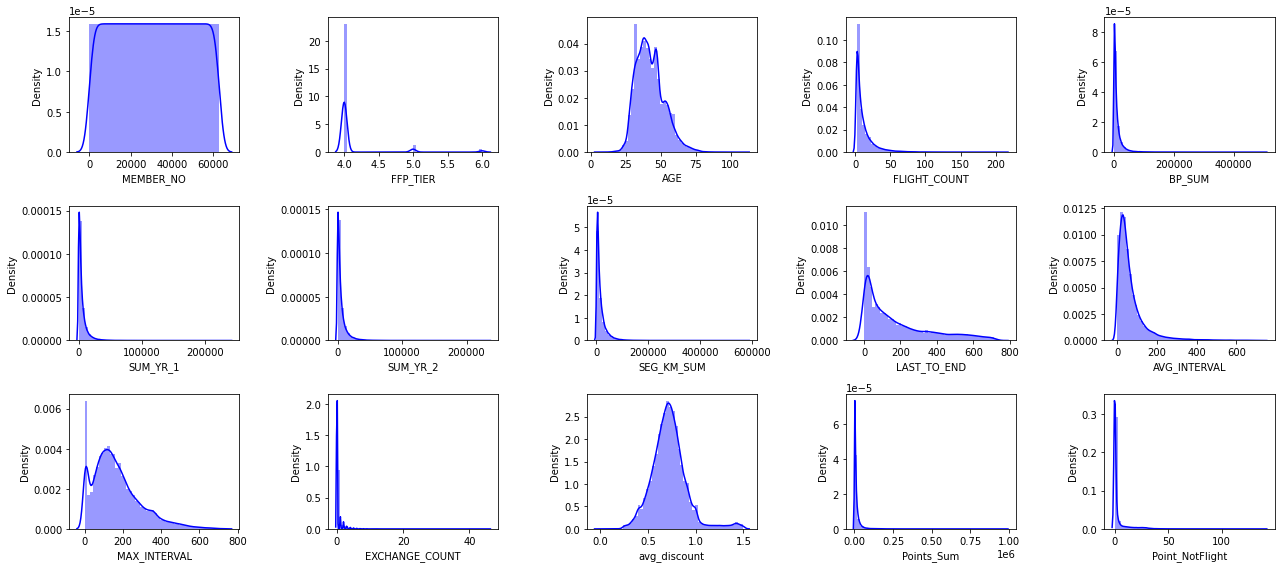

In [ ]:
# Univariate analysis terhadap kolom numerikal menggunakan distplot
plt.figure(figsize=(18, 8))
for i in range(0, len(numeric)):
  plt.subplot(3,5,i+1)
  sns.distplot(df[numeric[i]], color='blue')
  plt.tight_layout();

In [ ]:
# skewness value
for i in range(0, len(numeric)):
    print(f"Skewness {df[numeric].columns[i]} : {df[numeric[i]].skew()}")

Skewness MEMBER_NO : 1.320446898451163e-18
Skewness FFP_TIER : 3.873290798403592
Skewness AGE : 0.6259513251721389
Skewness FLIGHT_COUNT : 3.2153051579474066
Skewness BP_SUM : 5.660472851669501
Skewness SUM_YR_1 : 5.08803464862269
Skewness SUM_YR_2 : 4.601346426980965
Skewness SEG_KM_SUM : 3.884612209921392
Skewness LAST_TO_END : 1.1780712396622304
Skewness AVG_INTERVAL : 3.2073754731768838
Skewness MAX_INTERVAL : 1.073332581841645
Skewness EXCHANGE_COUNT : 8.199608074047509
Skewness avg_discount : 0.9567933070018152
Skewness Points_Sum : 8.38389682680554
Skewness Point_NotFlight : 4.270491906667679


Seluruh data numerik memiliki skewness positif dan pada kolom `MEMBER_NO` memiliki skewness yang mendekati 0 yang menandakan data bahwa berdistribusi normal

#### Data Kategorikal

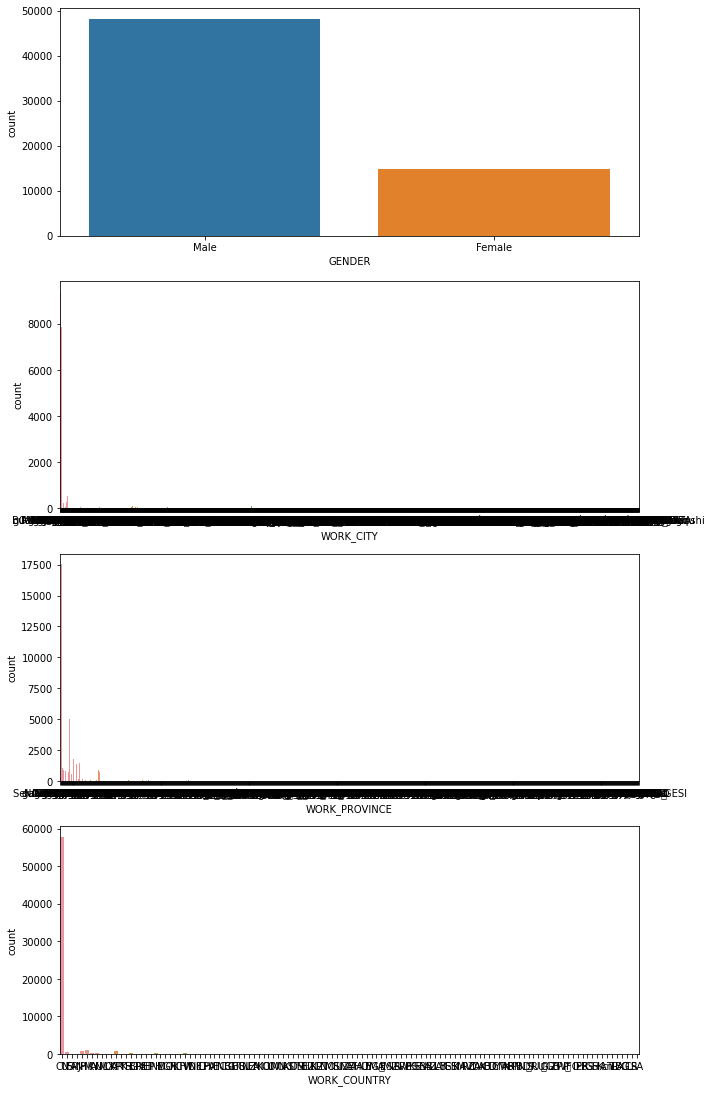

In [ ]:
plt.figure(figsize=(10, 30))
for i in range(0, len(categorical)):
    plt.subplot(8, 1, i+1)
    sns.countplot(df[categorical[i]])
    plt.tight_layout()

In [ ]:
for col in categorical:
    print(f'''All Data Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

All Data Value count kolom GENDER:
Male      48134
Female    14851
Name: GENDER, dtype: int64

All Data Value count kolom WORK_CITY:
guangzhou    9386
beijing      7845
shanghai     5001
shenzhen     3605
dalian       1979
             ... 
KASUGAI         1
hainan          1
xinxishi        1
KA              1
lingshui        1
Name: WORK_CITY, Length: 3234, dtype: int64

All Data Value count kolom WORK_PROVINCE:
guangdong        17509
beijing           8014
shanghai          4998
liaoning          4182
xinjiang          2512
                 ...  
YAMAGUCHI-KEN        1
AICHIKEN             1
SOUTU HOLLAND        1
xinxixian            1
JAWATIMUR            1
Name: WORK_PROVINCE, Length: 1165, dtype: int64

All Data Value count kolom WORK_COUNTRY:
CN    57748
HK      991
JP      875
KR      790
US      575
      ...  
CD        1
BI        1
CM        1
FL        1
GL        1
Name: WORK_COUNTRY, Length: 118, dtype: int64



* Kebanyakan member adalah laki-laki
* Secara keseluruhan data numerikal memiliki unique values yang banyak

### Multivariate Analysis

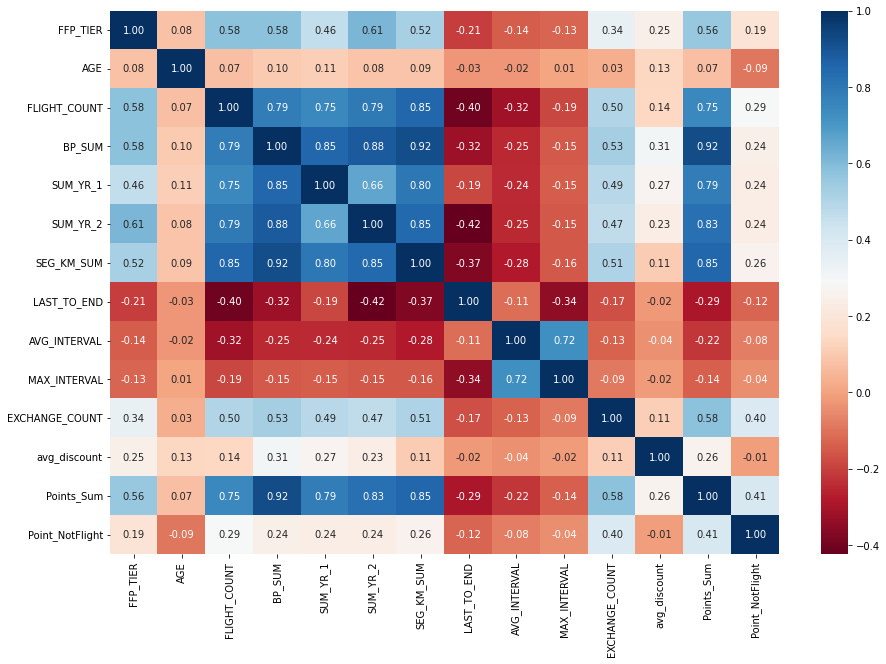

In [ ]:
# adjust the figure size for better readability
plt.figure(figsize=(15,10))

# plot the heatmap
correlation = df.drop(['MEMBER_NO'],axis=1).corr()
sns.heatmap(correlation, annot=True, cmap='RdBu', fmt='.2f')

* Dari heatmap korelasi diatas dapat diketahui bahwa beberpa feature memiliki korelasi yang tinggi dengan feature yang lainnya, seperti:
> * `FLIGHT_COUNT` :  Jumlah penerbangan Customer
> * `BP_SUM` :  Rencana Perjalanan
> * `SUM_YR_1` : Fare Revenue 
> * `SUM_YR_2` : Votes Prices
> * `SEG_KM_SUM` :  Total jarak(km) penerbangan yg sudah dilakukan
> * `Points_Sum` :  Jumlah poin yang didapat customer
* Mayoritas korelasi antar kolom adalah korelasi positif


## Data Preprocessing

### Handling Missing Values

In [ ]:
data_nan = df.isna().sum().reset_index()
data_nan.columns = ['feature','missing_value']
data_nan['percentage'] = round((data_nan['missing_value']/len(df))*100,3)
data_nan = data_nan.sort_values('percentage', ascending=False).reset_index(drop=True)
data_nan = data_nan[data_nan['percentage']>0]
data_nan

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,LAST_FLIGHT_DATE,421,0.668
4,AGE,420,0.667
5,SUM_YR_2,138,0.219
6,WORK_COUNTRY,26,0.041
7,GENDER,3,0.005


In [ ]:
print(f'Persentase Total missing value adalah:',data_nan['percentage'].sum(),'%')

Persentase Total missing value adalah: 11.234 %


Persentase missing values secara keseluruhan adalah `11.234%` yang mana kecil dari `30%`. Bisa dianggap bahwa nilai persentasenya kecil dan dilakukan drop values pada semua missing value tersebut.  

referensi: [How to deal with missing values in a data set ?](https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155)



In [ ]:
# Drop missing values
df_clean = df.dropna().reset_index(drop=True)
df_clean

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,234188.0,580717,2014-03-31,1,3.483254,18,34,0.961639,619760,50
1,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,164982.0,283712,2014-03-21,11,5.298507,18,20,1.254676,406361,26
2,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,125500.0,281336,2013-12-26,97,27.863636,73,11,1.090870,372204,12
3,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,130702.0,309928,2014-03-27,5,4.788079,47,27,0.970658,338813,39
4,56972,2008-02-10,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,76946.0,294585,2014-01-13,79,7.043956,52,10,0.967692,343121,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57855,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35.0,2014-03-31,...,0.0,3848,2013-01-20,437,0.000000,0,0,0.000000,0,0
57856,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25.0,2014-03-31,...,0.0,1134,2013-06-09,297,4.000000,4,1,0.000000,12318,22
57857,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38.0,2014-03-31,...,0.0,8016,2014-01-03,89,37.000000,60,14,0.000000,106972,43
57858,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43.0,2014-03-31,...,0.0,2594,2014-03-03,29,166.000000,166,0,0.000000,0,0


Data pada `LAST_FLIGHT_DATE` yang bernilai NaT sudah dihapus pada langkah ini.

In [ ]:
#pengecekan kembali missing values
df_clean.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

Karena customer yang paling banyak adalah dari China dimana dari https://www.statista.com/statistics/1101677/population-distribution-by-detailed-age-group-in-china/ diperoleh bahwa `2.54%` penduduk China berusia `>80`. Sehingga dalam hal ini akan dilakukan drop value pada data `AGE` lebih besar `100 tahun`.

In [ ]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)

In [ ]:
#jumlah data (baris dan kolom) setelah drop missing value
df_clean.shape

(57859, 23)

In [ ]:
df_clean.duplicated().sum()

0

### Feature Selection

Untuk melakukan segmentasi customer digunakan Metode RFM (*recency, frequency*, dan *monetary value*). Ide dari metode ini adalah mengelompokkan customer berdasarkan kapan pembelian terakhir, seberapa sering mereka membeli di masa lalu, dan berapa banyak yang telah mereka belanjakan secara keseluruhan. Metrik dari RFM merupakan indikator penting dari perilaku pelanggan karena *frequency* dan *monetary value* mempengaruhi *customer’s lifetime value* dan  *recency* mempengaruhi *retention*.



Metrik RFM ini adalah indikator penting dari perilaku pelanggan karena frekuensi dan nilai moneter mempengaruhi nilai umur pelanggan, dan kebaruan mempengaruhi retensi, ukuran keterlibatan.

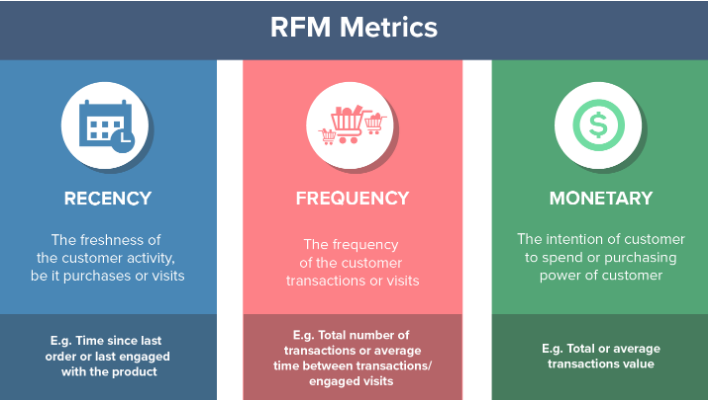

Pada projek kali ini akan dilakukan penambahan 2 metrik yaitu `L` dan `C`. Dimana `L` sendiri untuk mengetahui apakah customer baru atau lama dan `C` yang merujuk kepada diskon yang dapat mengidentifikasi customer. Sehingga Metode ini disebut dengan LRFMC (`Loyalty,Recency, Frequency, Monetary, Cabin`).

| LRFMC        | Kolom | Deskipsi| Satuan|
|:-------------|:-----|:--------|:--------|
|Loyalty   |`L = LOAD_TIME - FFP_DATE`|: Jumlah bulan sejak customer bergabung hingga (melihat apakah customer lama/tidak) | Bulan|
|Recency  |`R = LAST_TO_END`|: Jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir| Bulan|
|Frequency   |`F = FLIGHT_COUNT`|: Jumlah penerbangan Customer| Satuan waktu (kali)|
|Monetary   |`M = SEG_KM_SUM `|: Total jarak penerbangan yg sudah dilakukan| Km|
|Cabin   |`C = avg_discount` |: Rata rata discount yang didapat customer|

> Keempat kolom di atas akan digunakan dalam clustering di tahapan selanjutanya

In [ ]:
# Membuat dataframe baru untuk keempat kolom LRFMC
df_LRFMC = pd.DataFrame()
df_LRFMC['L'] = ((df_clean['LOAD_TIME']- df_clean['FFP_DATE']).dt.days/30)
df_LRFMC['R'] = df_clean['LAST_TO_END']
df_LRFMC['F'] = df_clean['FLIGHT_COUNT']
df_LRFMC['M'] = df_clean['SEG_KM_SUM']
df_LRFMC['C'] = df_clean['avg_discount']
df_LRFMC

,L,R,F,M,C
0,90.200000,1,210,580717,0.961639
1,87.166667,11,135,283712,1.254676
2,68.233333,97,23,281336,1.090870
3,60.533333,5,152,309928,0.970658
4,74.700000,79,92,294585,0.967692
...,...,...,...,...,...
57855,14.500000,437,2,3848,0.000000
57856,34.866667,297,2,1134,0.000000
57857,49.466667,89,4,8016,0.000000
57858,97.433333,29,2,2594,0.000000


### Handling Outliers
dari dataframe (data baru LRFMC) yang didapatkan akan dilakukan handling outliers. Sehingga perlu pengecekan terlebih dahulu dengan boxplot.

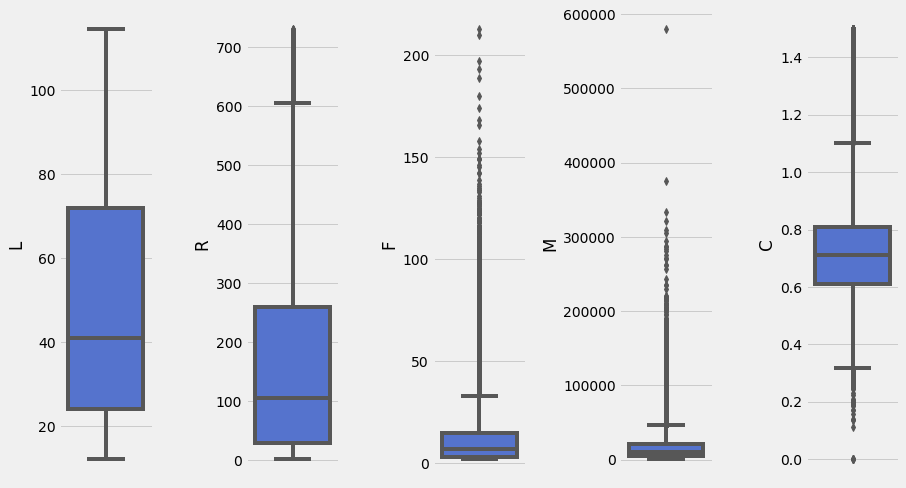

In [ ]:
# Ukuran gambar
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,7))

# plotting
feat_num = list(df_LRFMC)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC[feat_num[i]],color='royalblue', orient='v')
    plt.tight_layout()

Dari boxplot diatas dapat diketahui bahwa terdapat outliers pada data sehingga akan dihandling terlebih dahulu dengan log transformasi sehingga jumlah outliers akan berkurang dan distribusi data akan mendekati normal.
yaitu `log1p(a)` yang sama dengan `log(1+a`) untuk mencegah adanya data `-inf`.

In [ ]:
df_LRFMC_log = df_LRFMC.copy()

In [ ]:
df_LRFMC_log['L'] = np.log1p(df_LRFMC['L'])
df_LRFMC_log['R'] = np.log1p(df_LRFMC['R'])
df_LRFMC_log['F'] = np.log1p(df_LRFMC['F'])
df_LRFMC_log['M'] = np.log1p(df_LRFMC['M'])
df_LRFMC_log['C'] = np.log1p(df_LRFMC['C'])
df_LRFMC_log

,L,R,F,M,C
0,4.513055,0.693147,5.351858,13.272021,0.673780
1,4.479229,2.484907,4.912655,12.555718,0.813006
2,4.237482,4.584967,3.178054,12.547309,0.737580
3,4.119579,1.791759,5.030438,12.644099,0.678367
4,4.326778,4.382027,4.532599,12.593326,0.676862
...,...,...,...,...,...
57855,2.740840,6.082219,1.098612,8.255569,0.000000
57856,3.579808,5.697093,1.098612,7.034388,0.000000
57857,3.921313,4.499810,1.609438,8.989320,0.000000
57858,4.589380,3.401197,1.098612,7.861342,0.000000


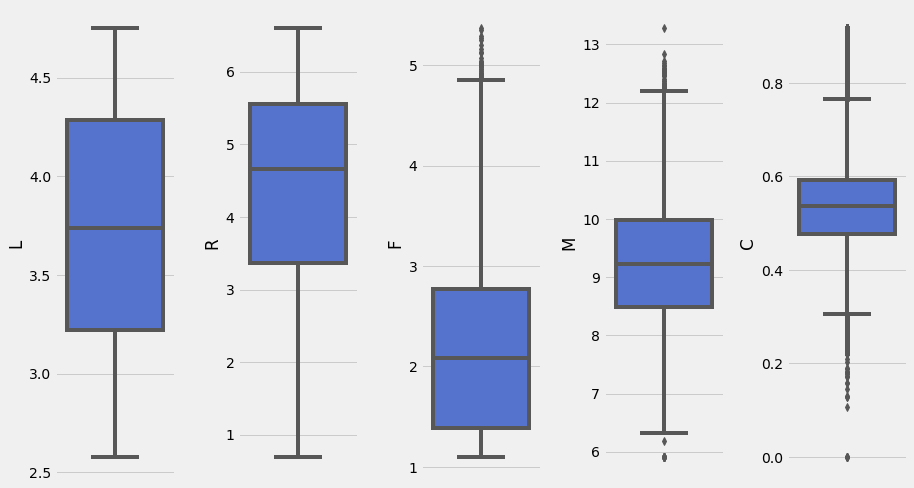

In [ ]:
# Ukuran gambar
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,7))

# plotting
feat_num = list(df_LRFMC_log)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC_log[feat_num[i]],color='royalblue', orient='v')
    plt.tight_layout()

In [ ]:
df_LRFMC_log.describe()

,L,R,F,M,C
count,57859.000000,57859.000000,57859.000000,57859.000000,57859.000000
mean,3.733410,4.387005,2.181904,9.248971,0.537202
std,0.604547,1.468930,0.834414,1.013407,0.103977
min,2.577688,0.693147,1.098612,5.910797,0.000000
25%,3.220208,3.367296,1.386294,8.493515,0.477487
50%,3.737670,4.663439,2.079442,9.231025,0.537328
75%,4.288174,5.560682,2.772589,9.976784,0.592406
max,4.749848,6.595781,5.365976,13.272021,0.916291


dari transformasi log masih terdapat outliers sehingga akan dilakukan remove outlier dengan metode IQR

In [ ]:
# Define IQR = Q3 - Q1
IQR = df_LRFMC_log.quantile(0.75) - df_LRFMC_log.quantile(0.25)

# Upper_limit = Q3 + 1.5 * IQR
upper_limit = df_LRFMC_log.quantile(0.75) + 1.5 * IQR

# Lower_limit = Q1 - 1.5 * IQR
lower_limit = df_LRFMC_log.quantile(0.25) - 1.5 * IQR

print(f'Baris sebelum dilakukan  IQR outlier filter: {len(df_LRFMC_log)}')

# Filter data berdasarkan limit (upper dan lower limit)
df_LRFMC_IQR = df_LRFMC_log.copy()
df_LRFMC_IQR = df_LRFMC_log[(df_LRFMC_log >= lower_limit) & (df_LRFMC_log <= upper_limit)]
    
# drop nan data
df_LRFMC_IQR = df_LRFMC_IQR.dropna().reset_index(drop=True)

print('Baris setelah dilakukan  IQR outlier filter', len(df_LRFMC_IQR))
df_LRFMC_IQR

Baris sebelum dilakukan  IQR outlier filter: 57859
Baris setelah dilakukan  IQR outlier filter 55219


,L,R,F,M,C
0,4.719391,3.555348,3.218876,12.153800,0.735833
1,3.084963,0.693147,4.709530,12.142009,0.701105
2,4.733270,2.772589,4.025352,11.943857,0.763606
3,3.857919,1.945910,4.442651,12.137912,0.661673
4,3.866328,2.197225,3.433987,12.007634,0.721374
...,...,...,...,...,...
55214,4.323691,5.433722,1.098612,6.336826,0.525274
55215,3.979058,5.564520,1.098612,6.803505,0.350657
55216,4.186620,5.347108,1.098612,6.807935,0.347130
55217,3.868419,6.161207,1.098612,6.727432,0.336472


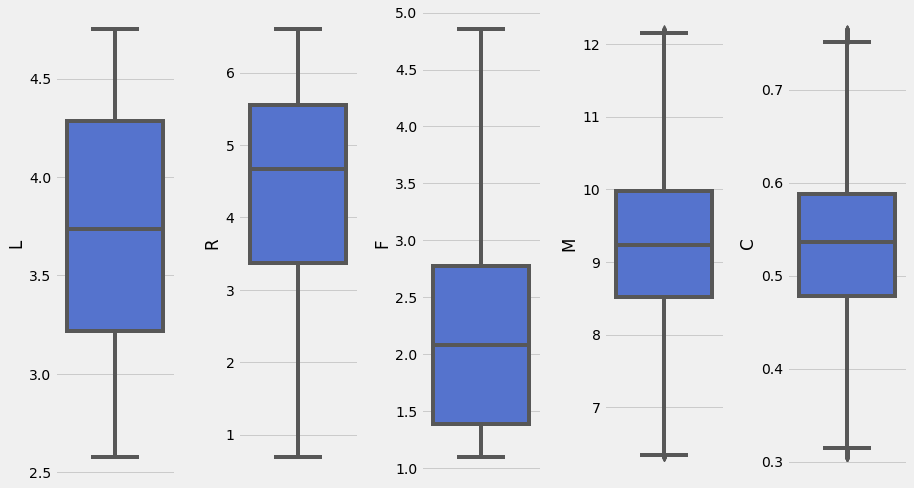

In [ ]:
# Ukuran gambar
plt.style.use("fivethirtyeight")
plt.figure(figsize=(18,7))

# plotting
feat_num = list(df_LRFMC_IQR)
for i in range(0, len(feat_num)):
    plt.subplot(1, 7, i+1)
    sns.boxplot(y=df_LRFMC_IQR[feat_num[i]],color='royalblue', orient='v')
    plt.tight_layout()

#### Scaling
Karena akan digunakan K-Means yang merupakan Machine learning berdasarkan jarak sehingga scalling data yang digunakan adalah standarisasi.

In [ ]:
# Standardize data 
std = StandardScaler().fit_transform(df_LRFMC_IQR)
df_LRFMC_std = pd.DataFrame(std, columns = list(df_LRFMC_IQR))
df_LRFMC_std

,L,R,F,M,C
0,1.639953,-0.569187,1.255263,2.900557,2.435862
1,-1.072346,-2.523630,3.064591,2.888768,2.021809
2,1.662985,-1.103691,2.234148,2.690649,2.766986
3,0.210357,-1.668185,2.740659,2.884671,1.551676
4,0.224312,-1.496576,1.516361,2.754415,2.263468
...,...,...,...,...,...
55214,0.983297,0.713453,-1.318273,-2.915451,-0.074549
55215,0.411386,0.802768,-1.318273,-2.448849,-2.156437
55216,0.755830,0.654309,-1.318273,-2.444420,-2.198492
55217,0.227783,1.210214,-1.318273,-2.524910,-2.325554


## Clustering

### Elbow Method
untuk mencari jumlah cluster optimal digunakan Elbow Method

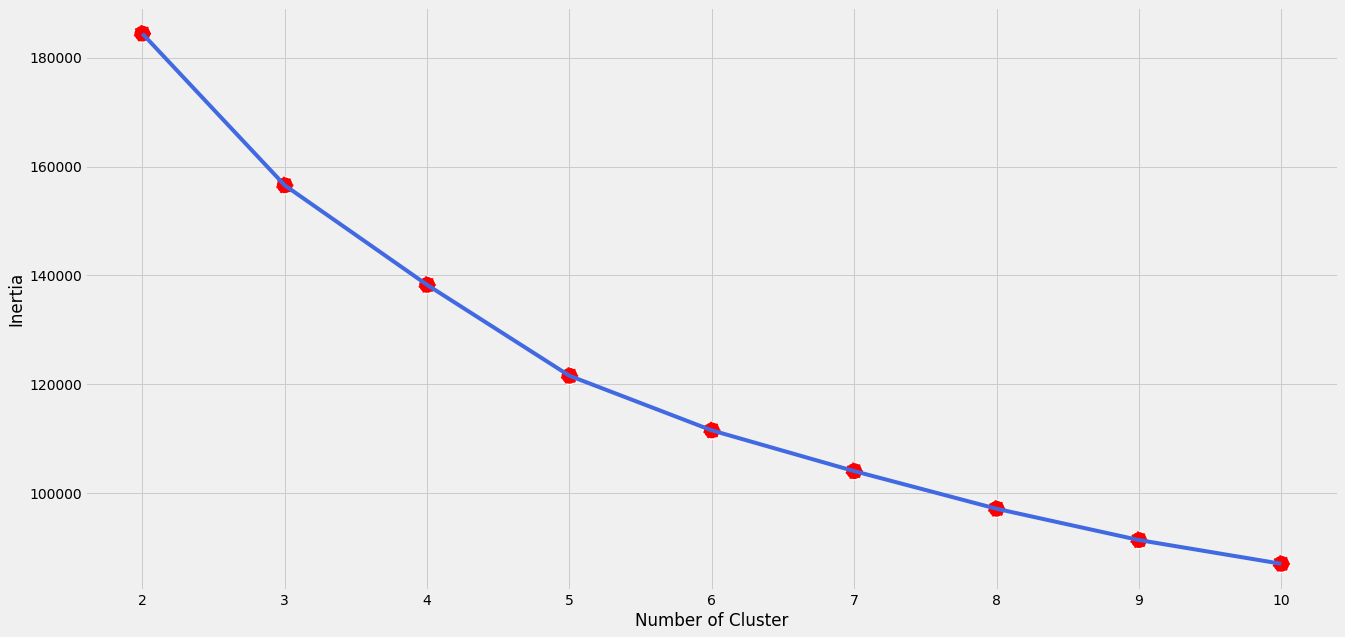

In [ ]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_LRFMC_std)
    inertia.append(kmeans.inertia_)


plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='royalblue', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='r',  linestyle='--')
plt.ylabel('Inertia')
plt.xlabel('Number of Cluster')
plt.show()

Dari grafik yang didapatkan terlihat bahwa jumlah cluster yang optimal adalah 5. Namun demikian perlu dilakukan evaluasi hasil cluster. Oleh karena itu dilakukan evaluasi hasil cluster dengan Sihouette Score

### Silhouette Score

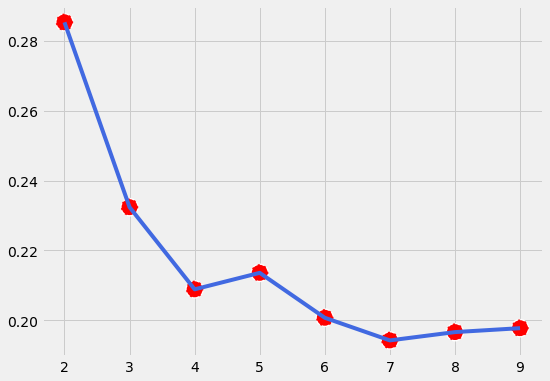

In [ ]:
# we will check for 3 - 10 cluster

range_n_clusters = list(range(2,10))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_LRFMC_std)
    preds = kmeans.predict(df_LRFMC_std)
     
    score_euclidean = silhouette_score(df_LRFMC_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)
    
    
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,10), y=arr_silhouette_score_euclidean, color='royalblue', linewidth = 4)
sns.scatterplot(x=range(2,10), y=arr_silhouette_score_euclidean, s=300, color='r',  linestyle='--')
plt.show()

Berdasarkan dari grafik Silhouette Score dapat dilihat bahwa jumlah cluster yang optimal adalah 5. Sehingga hasil dari elbow methods menunjukkan hasil yang sama dengan validasi.

### K-Means Model
dari jumlah cluster yang didapatkan maka dilakukan pembuatan model dengan jumlah cluster sebanyak 5

In [ ]:
# Create clusters using K-Means
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_LRFMC_std)

# Assign Cluster
cluster = kmeans.labels_
df_LRFMC_std['clusters'] = cluster
df_LRFMC_IQR['clusters'] = cluster

# see cluster on data after IQR step
df_LRFMC_IQR.head()

,L,R,F,M,C,clusters
0,4.719391,3.555348,3.218876,12.153800,0.735833,4
1,3.084963,0.693147,4.709530,12.142009,0.701105,4
2,4.733270,2.772589,4.025352,11.943857,0.763606,4
3,3.857919,1.945910,4.442651,12.137912,0.661673,4
4,3.866328,2.197225,3.433987,12.007634,0.721374,4


In [ ]:
# see cluster on data after std step
df_LRFMC_std.head()

,L,R,F,M,C,clusters
0,1.639953,-0.569187,1.255263,2.900557,2.435862,4
1,-1.072346,-2.523630,3.064591,2.888768,2.021809,4
2,1.662985,-1.103691,2.234148,2.690649,2.766986,4
3,0.210357,-1.668185,2.740659,2.884671,1.551676,4
4,0.224312,-1.496576,1.516361,2.754415,2.263468,4


### Visualisasi menggunakan PCA dan Scatterplot
Untuk melihat cluster secara visual dilakukan reduksi dimensi dengan menggunakan PCA lalu dilakukan plot menggunakan scatter plot

In [ ]:
#PCA dengan component = 2
pca = PCA(n_components=2)

pca.fit(df_LRFMC_std)
pcs = pca.transform(df_LRFMC_std)

data_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
data_pca['clusters'] = kmeans.labels_

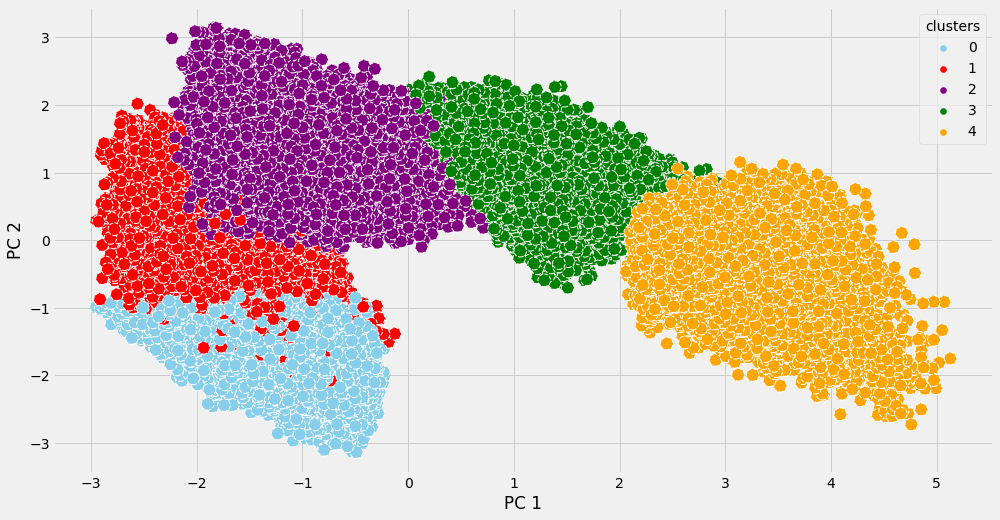

In [ ]:
# Plot the cluster in scatterlot

fig, ax = plt.subplots(figsize=(15,8))

sns.scatterplot(
    x="PC 1", y="PC 2",
    hue="clusters",
    linestyle='--',
    data=data_pca,
    palette=['skyblue','red','purple','green', 'orange'],
    s=160,
    ax=ax
)

Dar hasil scatterplot di atas dapat dikatakan bahwa jumlah cluster sama dengan 5 merupakan jumlah cluster yang tepat. Dimana dapat dilihat bahwa terlihat segmentasi yang cukup jelas antar clusternya

## Interpretasi cluster

### Statistik feature dari setiap cluster

In [ ]:
# jumlah customer masing-masing cluster
dist_clus = df_LRFMC_std['clusters'].value_counts().reset_index()
dist_clus.columns = ['cluster','costumer']
dist_clus['percentage (%)'] = round((dist_clus['costumer']/(sum(dist_clus['costumer'])))*100,2)
dist_clus

,cluster,costumer,percentage (%)
0,0,12500,22.64
1,1,11452,20.74
2,3,11400,20.65
3,4,10198,18.47
4,2,9669,17.51


#### Barplot (Persentase Costumer setiap cluster)

Text(0.5, 1.0, 'Jumlah Customer Untuk Setiap Cluster')

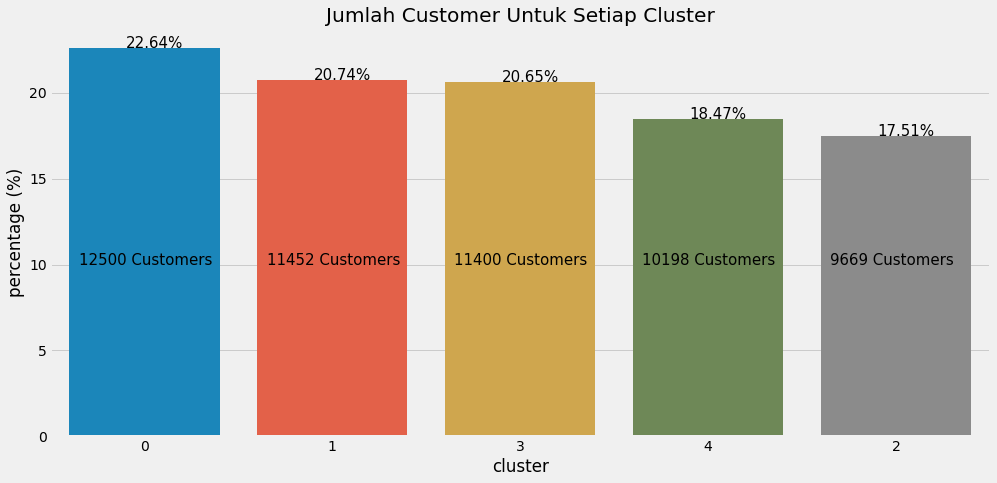

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))

br = sns.barplot(x = 'cluster',y='percentage (%)',
                 data=dist_clus,ax=ax, 
                 order=dist_clus.sort_values('percentage (%)',ascending = False).cluster)

x = np.arange(len(dist_clus['cluster']))
y = dist_clus['percentage (%)']
z = dist_clus['costumer']

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.1 , y = y[i], s = str(y[i])+'%', size = 15) # add data points

x_numbers = range(len(x))
for i in x_numbers:
    ax.text(x = x_numbers[i]-0.35 , y = 10, s = str(z[i])+' Customers', size = 15) # add data points

plt.title('Jumlah Customer Untuk Setiap Cluster')

Diperoleh jumlah customer dan persentasenya untuk masing-masing cluster yang menunjukkan bahwa persebaran customer cukup merata:
* cluster 1	sebanyak 12500 customer (22.64%)
*	cluster 2	sebanyak 11452 customer (20.74%)
*	cluster 3	sebanyak 11400 customer (20.65%)
*	cluster 0	sebanyak 10198 customer (18.47%)
*	cluster 4	sebanyak 9669	 customer (17.51%)

#### Radar Plot (Mean-Median LRFMC setiap cluster)

In [ ]:
# group data cluster berdasarkan mean
avg_cluster_mean = df_LRFMC_std.groupby('clusters').mean().reset_index(drop=True)
avg_cluster_mean

,L,R,F,M,C
0,0.924665,0.101441,-0.036129,0.054207,-0.024115
1,-0.297234,0.758457,-0.906109,-1.005199,0.871252
2,-0.461626,0.604631,-0.865997,-0.775665,-1.285787
3,-0.890992,-0.353369,0.382332,0.434776,0.020103
4,0.634084,-1.154308,1.455492,1.311769,0.247789


In [ ]:
# radar chart

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_mean.loc[i].values.tolist() + avg_cluster_mean.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_mean.columns.tolist() + avg_cluster_mean.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_mean.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])),title="Cluster - LRFMC ")

fig.show()

In [ ]:
# melihat radarplot media untuk mengidentifikasi apakah memiliki
# pola yang sama dengan mean atau tidak

avg_cluster_med = df_LRFMC_std.groupby('clusters').median().reset_index(drop=True)
avg_cluster_med

,L,R,F,M,C
0,0.981830,0.225066,0.015202,0.065884,-0.019234
1,-0.356206,0.893295,-0.969090,-0.974933,0.815501
2,-0.520132,0.748330,-0.969090,-0.771067,-1.222935
3,-0.885906,-0.224285,0.364385,0.430382,0.029350
4,0.786647,-1.147761,1.392819,1.295151,0.227028


In [ ]:
# radar chart

import plotly.graph_objects as go

fig = go.Figure()

for i in range(5):
    fig.add_trace(go.Scatterpolar(r=avg_cluster_med.loc[i].values.tolist() + avg_cluster_med.loc[i].values.tolist()[:1],
                                  theta=avg_cluster_med.columns.tolist() + avg_cluster_med.columns.tolist()[:1],
                                  name="CLUSTER-%s"%avg_cluster_med.index[i],
                                  showlegend=True))

fig.update_layout(polar=dict(radialaxis=dict(visible=True, range=[-1.5, 1.5])),title="Cluster - LRFMC")

fig.show()

Dari radar plot mean dan median dapat diketahui bahwa memiliki karakteristik yang sama.Terbentuknya 5 Cluster tersebut dikarenakan adanya unsur LRFMC yang bernilai beda dari setiap clusternya.
* Besarnya nilai L menunjukkan bahwa customer merupakan customer yang lama dan sebaliknya. Sehingga dari sini kita dapat mengetahui customer lama dan baru.
* Besarnya nilai R menunjukkan bahwa semakin besar jarak waktu penerbangan terakhir ke pesanan penerbangan paling akhir dan sebaliknya. Artinya nilai yang kecil bagus untuk business karena customer melakukan penerbangan dalam waktu yang dekat
* Besarnya nilai F menunjukkan bahwa customer sering melakukan penerbangan dengan maskapai ini sehingga dapat meningkatkan customer engagement terhadap maskapai dan sebaliknya. Artinya semakin besar nilai F maka akan menguntungkan customer karena sering melakukan penerbangan dengan maskapai ini.
* Besarnya nilai M menunjukkan bahwa jarak penerbangan semakin besar dimana semakin jauh jarak penerbangan maka customer akan banyak mengeluarkan uangnya dan sebaliknya. Sehingga jika customer sering melakukan penerbangan dan dalam jarak yang jauh maka akan menguntungkan bagi maskapai.
* Besarnya nilai C menunjukkan bahwa customer mendapatkan diskon yang besar dan sebaliknya

In [ ]:
# reverse transformasi logaritma
df_cluster = df_LRFMC_IQR.copy()
df_cluster['L'] = np.expm1(df_LRFMC_IQR['L'])
df_cluster['R'] = np.expm1(df_LRFMC_IQR['R'])
df_cluster['F'] = np.expm1(df_LRFMC_IQR['F'])
df_cluster['M'] = np.expm1(df_LRFMC_IQR['M'])
df_cluster['C'] = np.expm1(df_LRFMC_IQR['C'])
df_cluster

,L,R,F,M,C,clusters
0,111.100000,34.0,24.0,189813.0,1.087220,4
1,20.866667,1.0,110.0,187588.0,1.015978,4
2,112.666667,15.0,55.0,153868.0,1.146001,4
3,46.366667,6.0,84.0,186821.0,0.938031,4
4,46.766667,8.0,30.0,164001.0,1.057257,4
...,...,...,...,...,...,...
55214,74.466667,228.0,2.0,564.0,0.690922,1
55215,52.466667,260.0,2.0,900.0,0.420000,2
55216,64.800000,209.0,2.0,904.0,0.415000,2
55217,46.866667,473.0,2.0,834.0,0.400000,2


In [ ]:
df_stat = df_cluster.groupby('clusters').agg(['mean','median','min','max'])
df_stat

L                                             R              \
               mean     median        min         max        mean median  min   
clusters                                                                        
0         74.444485  74.400000  33.233333  114.566667  148.111760  111.0  1.0   
1         39.552628  32.666667  12.166667  113.766667  322.825096  297.0  1.0   
2         35.582590  29.500000  12.166667  114.566667  276.678457  240.0  1.0   
3         24.749266  23.466667  12.166667   51.933333   87.564649   57.0  1.0   
4         65.727319  66.033333  12.700000  114.566667   26.674348   14.0  1.0   

                         F                                M                   \
            max       mean median  min    max          mean   median     min   
clusters                                                                       
0         727.0   8.606000    8.0  2.0   38.0  12887.827920  11143.0  1158.0   
1         730.0   3.496071    3.0  2.0   14.0   4601.909710   3934.0   552.0   
2         731.0   3.667287    3.0  2.0   19.0   5724.747440   4824.0   716.0   
3         615.0  12.564035   11.0  2.0   62.0  18806.137193  16045.0  1840.0   
4         461.0  32.502844   27.0  4.0  127.0  44981.272210  38105.0  6168.0   

                           C                                
               max      mean    median       min       max  
clusters                                                    
0          91771.0  0.702011  0.698785  0.360508  1.141667  
1          48928.0  0.833337  0.821985  0.633399  1.148420  
2          48928.0  0.529952  0.535650  0.356790  0.700000  
3         169224.0  0.707881  0.705722  0.371205  1.147987  
4         198627.0  0.740782  0.734239  0.381285  1.146924

Urutan cluster berdasarkan mean dari LRFMC
* L : 0 > 4 > 1 > 2 > 3
* R : 1 > 2 > 0 > 3 > 4
* F : 4 > 3 > 0 > 2 > 1
* M : 4 > 3 > 0 > 2 > 1
* C : 1 > 4 > 3 > 0 > 2



### Deskripsi customer di masing-masing cluster

#####Cluster 0
Cluster 0 merupakan customer lama dimana rata-rata nilai Loyalti yang besar. Customer rata-rata melakukan penerbangan ulang dalam kategori begitu juga dengan frekuensi penerbangan serta monetarynya. Namun, Customer ini merupakan customer yang bisa disebut customer yang rata-rata sedikit mendapatkan diskon dari maskapai

#####Cluster 1
Cluster 1 merupakan customer menengah yang ditunjukan nilai L berada di tengah-tengah cluster yag lainnya. Customer ini melakukan penerbangan dari penerbangan sebelumnya memiliki jarak waktu yang lama. Kemudian, customer ini merupakan customer yang paling sedikit melakukan perjalanan dan perjalananya pun yang paling dekat dibandingkan dengan cluster yang lainnya. Namun, cluster ini merupakan customer yang mendapatkan rata-rata diskon yang paling besar dibandingkan cluster yang lainnya

##### Cluster 2
Cluster 2 merupakan customer baru dalam penerbangan. Rata-rata customer pada cluster ini melakukan penerbangan setelah penerbangan terakhir memiliki jarak waktu yang cukup lama. Kemudian, customer ini merupakan customer yang paling sedikit melakukan perjalanan dan **perjalananya** pun yang paling dekat setelah customer cluster 1. Selain itu, customer pada cluster ini rata-rata mendapatkan diskon yang paling sedikit dibandingkan cluster yang lainnya.

#####Cluster 3
Cluster 3 merupakan customer yang paling baru yang ditandai dengan nilai L yang kecil. Customer pada cluster ini termasuk customer yang melakukan penerbangan selanjutnya dari penerbangan terakhir dengan jarak yang cukup dekat. Selain itu, customer ini juga merupakan customer dengan jumlah penerbangan yang cukup banyak dan dalam jarak yang cukup jauh. Dalam segi diskon, customer pada cluster ini mendapatakn diskon yang menengah.

#####Cluster 4
Cluster 4 merupakan customer yang terbilang customer lama. Customer ini melakukan perjalanan dari perjalanan terakhir dalam waktu yang paling dekat dibandingkan cluster yang lainnya. Selain itu cluster ini merupakan cluster dengan rata-rata melakukan perjalanan yang lebih sering dan melakukan perjalana yang paling jauh dibandingkan cluster lainnya. Serta dalam diskon, cluster ini terbilang mendapatkan diskon yang cukup besar.

### Rekomendasi Strategi Bisnis

##### Cluster 0
Sebagaimana yang diketahui bahwa cluster ini merupakan customer yang paling loyal namun tidak begitu sering melakukan perjalanan sehingga perlu dilakukan pendekatan lebih agar customer tidak menghilang seperti pengiriman pesan kepada customer pada cluster ini serta memeberikan diskon/promo sebagaimana yang diketahui bahwa cluster ini termasuk cluster yang mendapatkan sedikit diskon.

##### Cluster 1
Pendekatan pada cluster 1 ini harus lebih agresif tidak hanya cukup memberikan diskon. seperti yang diketahui bahwa cluster ini merupakan cluster yang paling besar mendapatkan diskon akan tetapi sedikit melakukan perjalanan dan perjalannya pun dalam jarak yang dekat. Sehingga pada cluster perlu diberikan program khusus.

##### Cluster 2
Cluster 2 ini merupakan cluster yang hampir sama dengan cluster 1. Hanya saja cluster 2 ini merupakan cluster yang paling sedikit mendapatkan diskon sehingga dapat dilakukan pendekatan pada cluster ini dengan memberikan diskon/promo tertentu.

##### Cluster 3
Cluster ini merupakan customer yang baru namun melakukan penerbangan dalam waktu yang berdekatan dan juga sering melakukan perjalanan. Cluster ini merupakan cluster yang potensial sehingga potensi ini harus dipertahankan/ditingkatkan. Karena merupakan customer baru, dapat dilakukan diberikan berbagai layanan tertentu agar nyaman melakukan penerbangan dengan maskapai ini.

##### Cluster 4
Cluster ini merupakan cluster dengan customer yang merupakan customer lama. Selain itu, cluster ini merupakan cluster yang sangat potensial bagi maskapai karean sering melakukan perjalanan dan juga dalam jarak jauh. Sehingga cluster ini perlu dipertahakan sehingga hal yang bisa dilakukan untuk cluster ini adalah seperti pemberian harga khusus karena sudah loyal pada maskapai ini dan layanan yang lainnya yang membuat customer pada cluster 4 ini merasa lebih nyaman dan betah.